In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# 📌 2. Load Dataset

In [4]:

data = pd.read_csv('/content/Salary_Data.csv')  # Update path if needed
data.head()



,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# 📌 3. Basic Data Overview

In [5]:

print("Shape:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nNull values:\n", data.isnull().sum())
print("\nData types:\n", data.dtypes)


Shape: (6704, 6)

Columns: ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']

Null values:
 Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

Data types:
 Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [6]:
# prompt: drop null values from data set

# Drop rows with any null values
data.dropna(inplace=True)

# Verify no null values remain
print("\nNull values after dropping:\n", data.isnull().sum())


Null values after dropping:
 Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [ ]:
data=data.drop[]

In [22]:
cols=data.columns.tolist()
for col in cols:
  print(data[col].value_counts())

Age
27.0    515
30.0    449
29.0    444
28.0    429
33.0    398
26.0    393
31.0    364
32.0    351
34.0    309
25.0    284
36.0    281
24.0    240
35.0    200
42.0    176
43.0    158
39.0    158
37.0    156
38.0    149
45.0    144
41.0    129
44.0    126
23.0    104
46.0    102
48.0     98
40.0     92
49.0     91
50.0     88
47.0     47
21.0     18
22.0     15
Name: count, dtype: int64
Gender
Male      3536
Female    2964
Other        8
Name: count, dtype: int64
Education Level
Bachelor's Degree    2250
Master's Degree      1543
PhD                  1236
Bachelor's            754
High School           442
Master's              283
Name: count, dtype: int64
Job Title
Software Engineer                     518
Data Scientist                        445
Data Analyst                          363
Product Manager                       313
Senior Project Engineer               305
                                     ... 
Junior Social Media Specialist          1
Senior Product Development Man

In [14]:
data = data[data['Education Level']!='phD']

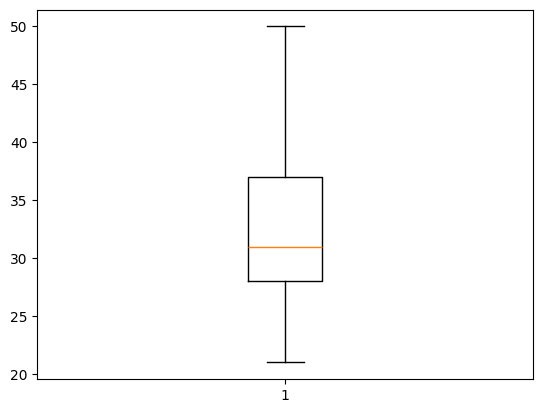

In [21]:
plt.boxplot(data['Age'])
plt.show()

In [20]:
data=data[data['Age']<51]

In [24]:
# prompt: get all the fileds in Job title row

# Assuming 'Job Title' is the column name you want to extract unique values from
if 'Job Title' in data.columns:
  print("\nUnique values in 'Job Title' column:")
  print(data['Job Title'].unique())
else:
  print("\n'Job Title' column not found in the DataFrame.")


Unique values in 'Job Title' column:
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Business Analyst' 'VP of Operations' 'IT Support'
 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst'
 'Business Intelligence Analyst' 'Event Coordinator' 'VP of Finance'
 'Graphic Designer' 

#Encoding

In [26]:
# 📌 4. Encode Categorical Columns (if any)
categorical_cols = data.select_dtypes(include='object').columns.tolist()

encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le


In [27]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,11,1,0,172,7,99
1,7,0,3,17,5,48
2,24,1,5,141,17,270
3,15,0,0,112,9,39
5,8,1,0,90,4,34
...,...,...,...,...,...,...
6699,28,0,5,30,22,389
6700,11,1,2,112,5,24
6701,9,0,1,38,6,34
6702,25,1,4,93,16,243


from matplotlib import pyplot as plt
data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Education Level'].plot(kind='hist', bins=20, title='Education Level')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Job Title'].plot(kind='hist', bins=20, title='Job Title')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Age', y='Gender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Gender', y='Education Level', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Education Level', y='Job Title', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Job Title', y='Years of Experience', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Education Level'].plot(kind='line', figsize=(8, 4), title='Education Level')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Job Title'].plot(kind='line', figsize=(8, 4), title='Job Title')
plt.gca().spines[['top', 'right']].set_visible(False)

In [44]:

x = data.drop(columns=['Salary'])
y = data['Salary']



In [45]:
y



,Salary
0,99
1,48
2,270
3,39
5,34
...,...
6699,389
6700,24
6701,34
6702,243


In [46]:
# 📌 6. Normalize Features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [48]:
# 📌 7. Split Data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [49]:
# 📌 8. Train Model
model = GradientBoostingRegressor()
model.fit(x_train, y_train)


GradientBoostingRegressor()

In [50]:
# 📌 9. Evaluate Model
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.918286158323157
MSE: 1340.0105439890726


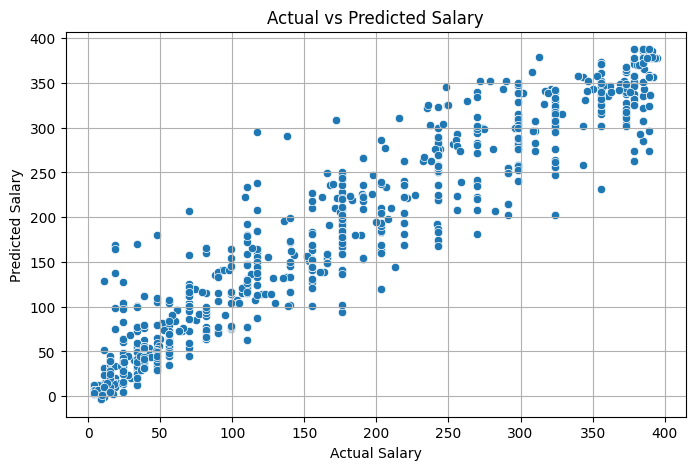

In [51]:
# 📌 10. Visualize Prediction Results
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.show()


In [52]:
# 📌 11. Save the Model & Scaler
joblib.dump(model, 'model_pipeline.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoders, 'label_encoders.pkl')


['label_encoders.pkl']

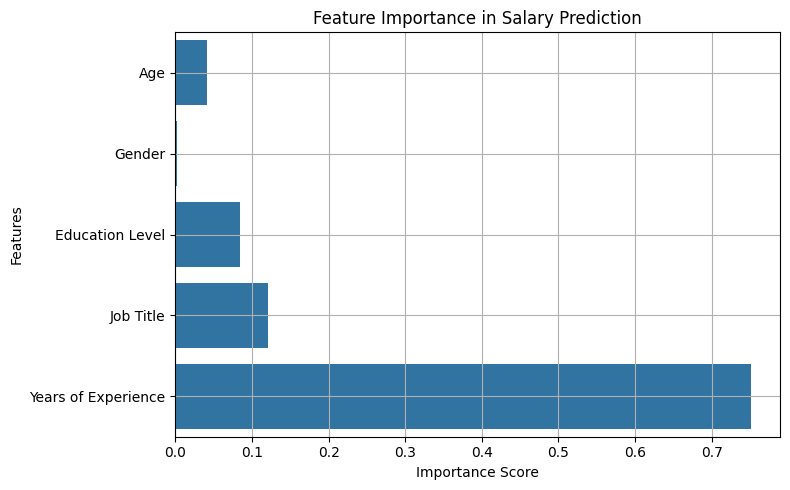

In [53]:
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Salary Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:
results_df = pd.DataFrame({
    'Actual Salary': y_test,
    'Predicted Salary': y_pred
})
results_df.to_csv('prediction_results.csv', index=False)

